<a href="https://www.kaggle.com/code/yunasheng/simple-blood-cell-cancer-detection?scriptVersionId=163925190" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

2024-02-23 00:07:08.754836: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 00:07:08.754938: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 00:07:08.894458: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import itertools

#Import image read library
from PIL import Image

#Import ML library
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score , confusion_matrix

In [4]:
import pathlib
data_dir='/kaggle/input/blood-cells-image-dataset/bloodcells_dataset'
data_dir=pathlib.Path(data_dir).with_suffix('')

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset='training',
    seed = 123,
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset='validation',
    seed = 123,
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 17092 files belonging to 8 classes.
Using 13674 files for training.
Found 17092 files belonging to 8 classes.
Using 5127 files for validation.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(8,activation='softmax'))

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5


I0000 00:00:1708646854.253849      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


428/428 [==============================] - 34s 67ms/step - loss: 2.3799 - accuracy: 0.3622 - val_loss: 1.6394 - val_accuracy: 0.5036
Epoch 2/5
428/428 [==============================] - 22s 50ms/step - loss: 1.6302 - accuracy: 0.5438 - val_loss: 1.4271 - val_accuracy: 0.5604
Epoch 3/5
428/428 [==============================] - 22s 51ms/step - loss: 1.4982 - accuracy: 0.5378 - val_loss: 1.3699 - val_accuracy: 0.5963
Epoch 4/5
428/428 [==============================] - 22s 50ms/step - loss: 1.1864 - accuracy: 0.5926 - val_loss: 1.4886 - val_accuracy: 0.4613
Epoch 5/5
428/428 [==============================] - 23s 52ms/step - loss: 1.1543 - accuracy: 0.5972 - val_loss: 1.2615 - val_accuracy: 0.5631


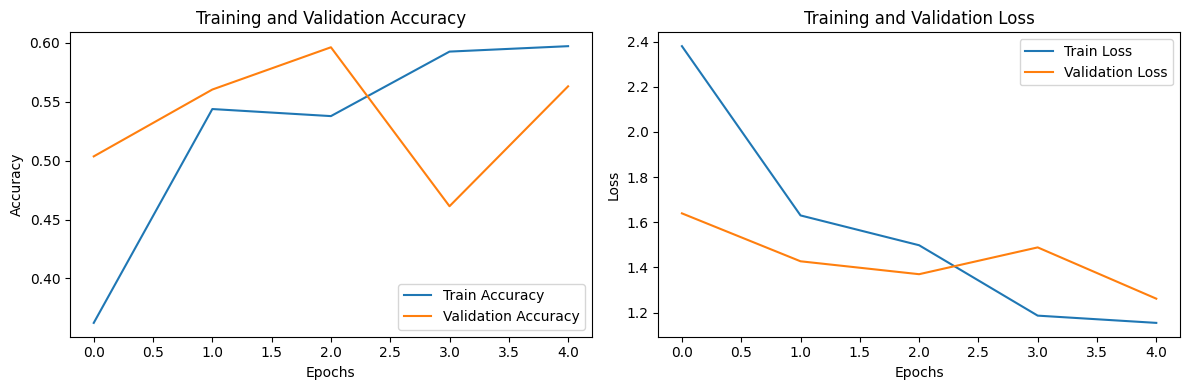

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()